<a href="https://colab.research.google.com/github/SamDarkKnight/EDA-PROJECT/blob/main/22BDS0413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, chi2_contingency
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv"
df = pd.read_csv(url)

display(df.head())

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y


In [78]:
display(df.tail())

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N
7583,7584,12,F,S4DoShout,no,316,shout,self,do,N


In [79]:
print("Dimensions (rows, columns):", df.shape)

Dimensions (rows, columns): (7584, 10)


In [80]:
print("\n=== Summary Statistics ===")
print(df.describe(include='all'))


=== Summary Statistics ===
           rownames        Anger Gender         item  resp         id  btype  \
count   7584.000000  7584.000000   7584         7584  7584  7584.0000   7584   
unique          NaN          NaN      2           24     3        NaN      3   
top             NaN          NaN      F  S1WantCurse    no        NaN  curse   
freq            NaN          NaN   5832          316  3973        NaN   2528   
mean    3792.500000    20.003165    NaN          NaN   NaN   158.5000    NaN   
std     2189.456554     4.841139    NaN          NaN   NaN    91.2269    NaN   
min        1.000000    11.000000    NaN          NaN   NaN     1.0000    NaN   
25%     1896.750000    17.000000    NaN          NaN   NaN    79.7500    NaN   
50%     3792.500000    19.000000    NaN          NaN   NaN   158.5000    NaN   
75%     5688.250000    23.000000    NaN          NaN   NaN   237.2500    NaN   
max     7584.000000    39.000000    NaN          NaN   NaN   316.0000    NaN   

         si

In [81]:
#finding data types
print("\nData Types:\n", df.dtypes)


Data Types:
 rownames     int64
Anger        int64
Gender      object
item        object
resp        object
id           int64
btype       object
situ        object
mode        object
r2          object
dtype: object


In [82]:
#finding missing values
Missing_Values =df.isnull().sum()
print(Missing_Values)

rownames    0
Anger       0
Gender      0
item        0
resp        0
id          0
btype       0
situ        0
mode        0
r2          0
dtype: int64


In [83]:
#counting no of unique values
print("\nUnique Values per Column:\n", df.nunique())


Unique Values per Column:
 rownames    7584
Anger         26
Gender         2
item          24
resp           3
id           316
btype          3
situ           2
mode           2
r2             2
dtype: int64


In [84]:
#To fill missing values with mode
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [85]:
# Remove duplicates
df = df.drop_duplicates()

In [86]:
print("\n=== Mean, Median, Mode for Numerical Columns ===")

# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Filter out unwanted columns if present
num_cols_filtered = [col for col in num_cols if col not in ["rownames", "Person_ID"]]

for col in num_cols_filtered:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = list(df[col].mode())
    print(f"\nColumn: {col}")
    print(f"  Mean  : {mean_val}")
    print(f"  Median: {median_val}")
    print(f"  Mode  : {mode_val}")


=== Mean, Median, Mode for Numerical Columns ===

Column: Anger
  Mean  : 20.003164556962027
  Median: 19.0
  Mode  : [19]

Column: id
  Mean  : 158.5
  Median: 158.5
  Mode  : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,

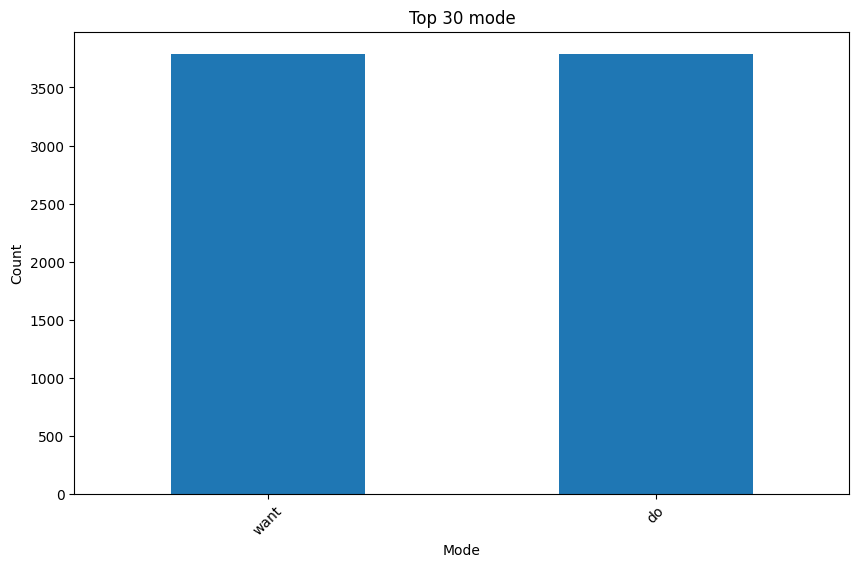

In [87]:
col = "mode"
df[col].value_counts().nlargest(30).plot(kind='bar', figsize=(10, 6))
plt.title(f"Top 30 {col}")
plt.ylabel("Count")
plt.xlabel(col.capitalize())
plt.xticks(rotation=45)
plt.show()


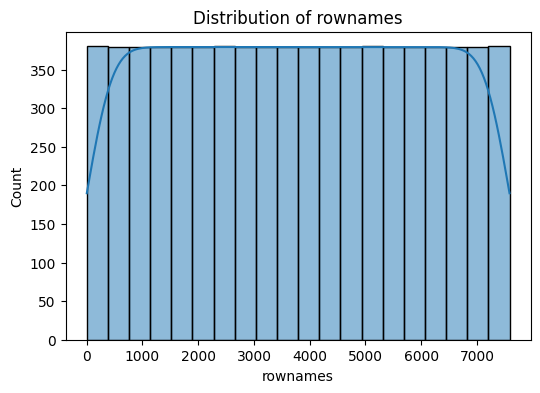

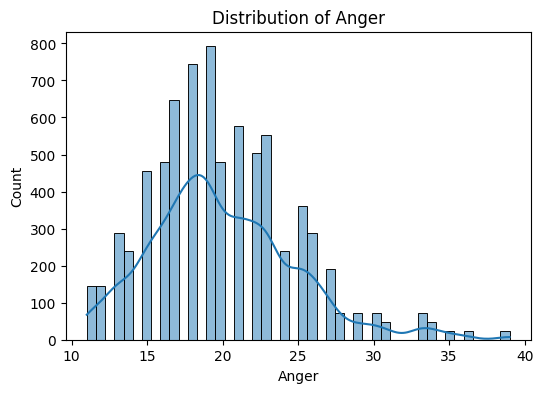

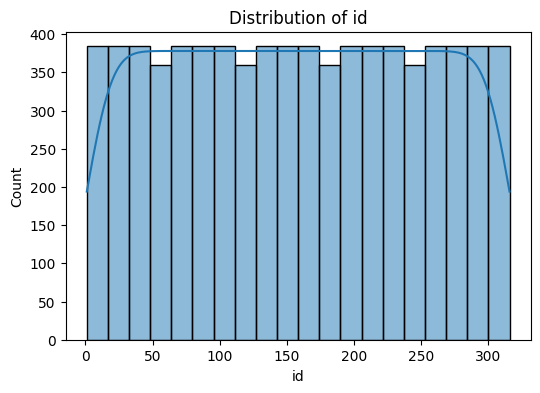

In [88]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

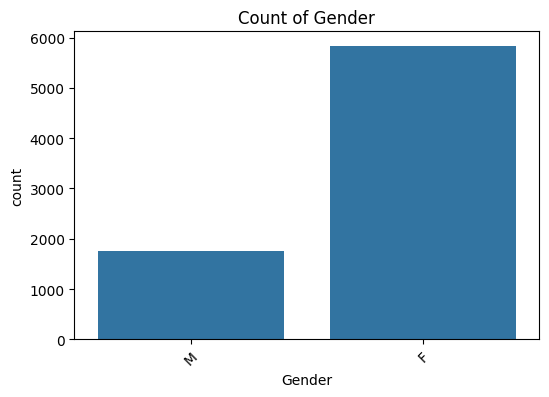

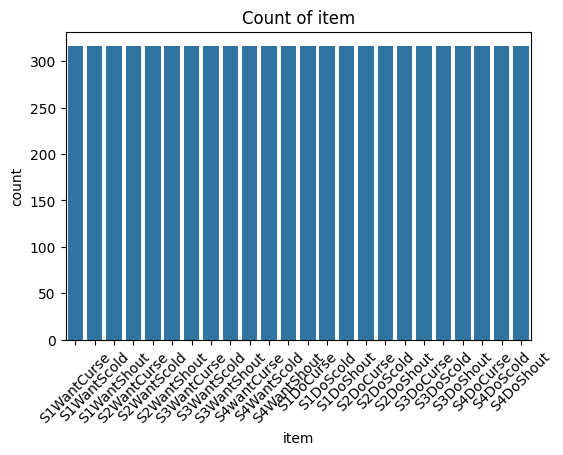

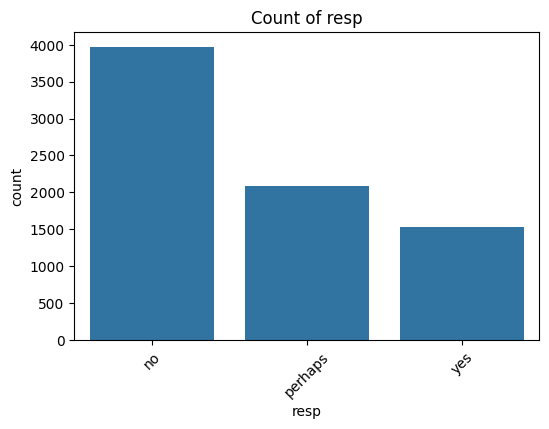

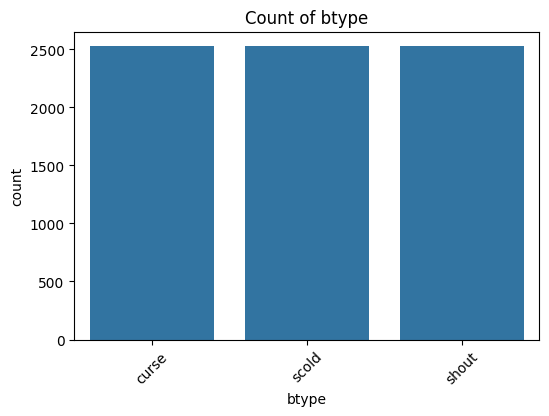

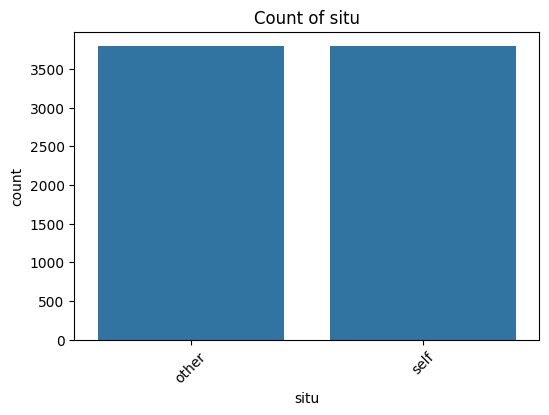

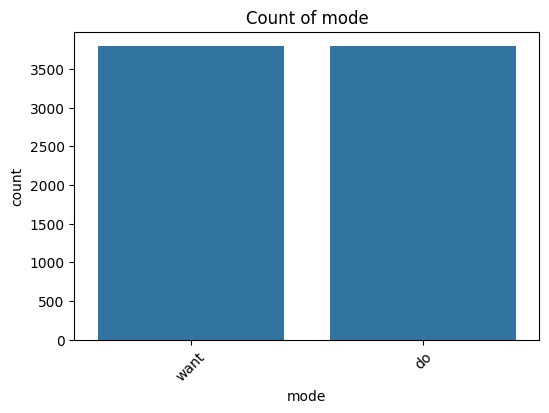

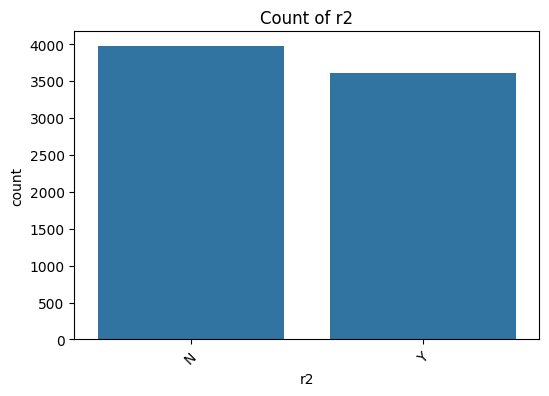

In [89]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

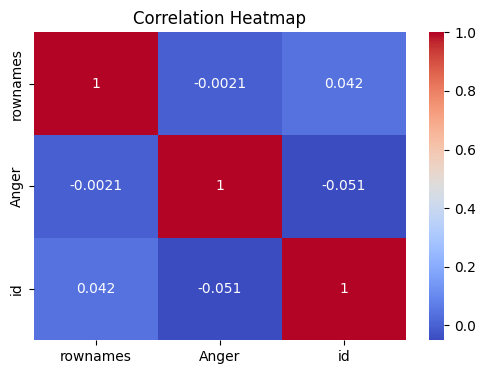

In [90]:
#Bivariate analysis
plt.figure(figsize=(6, 4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

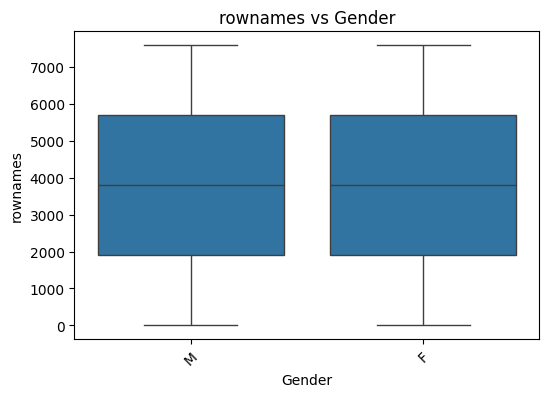

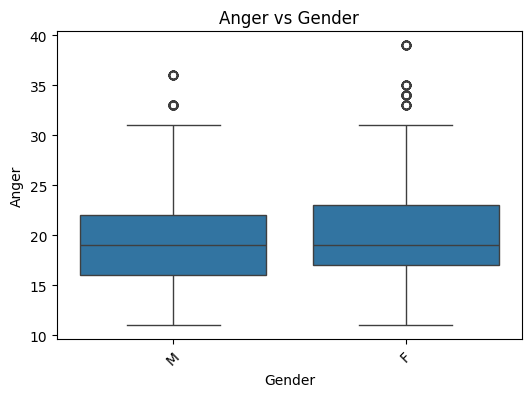

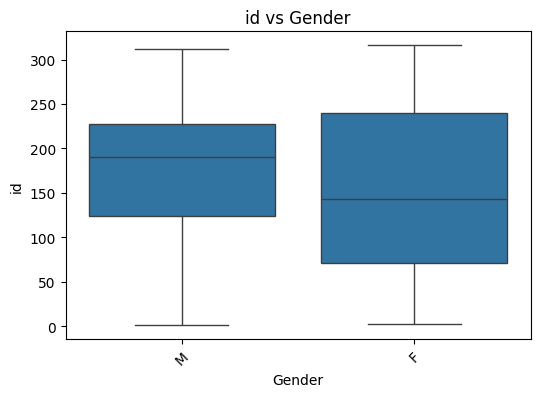

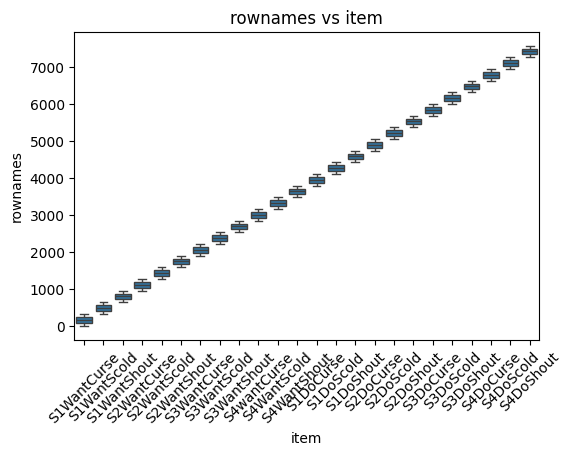

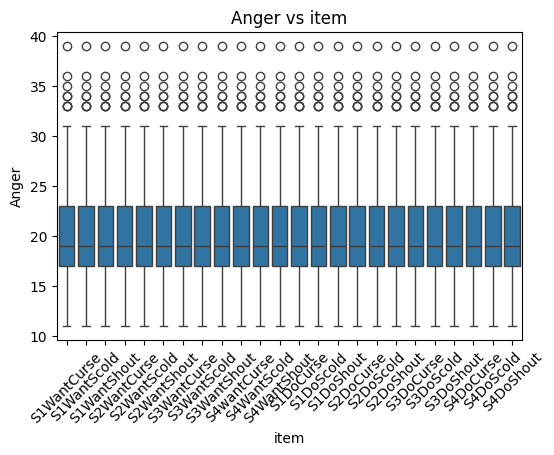

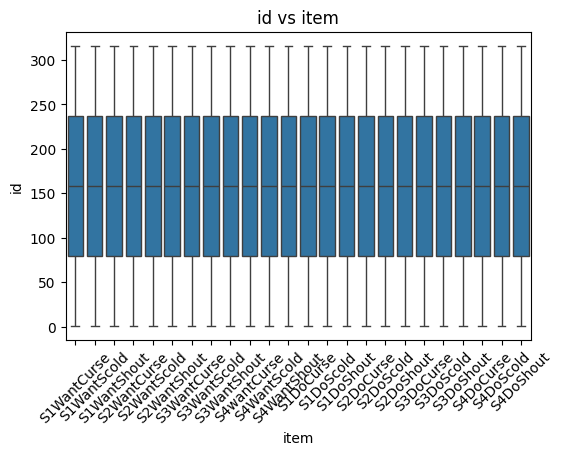

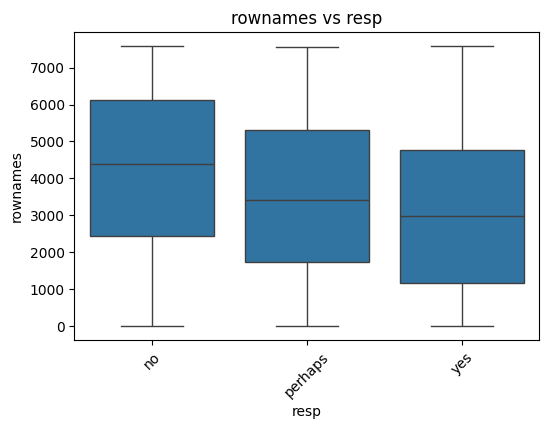

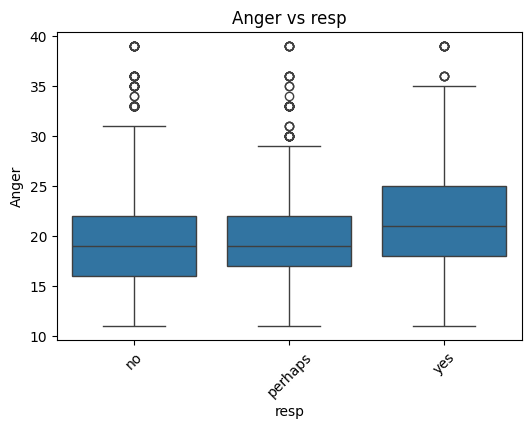

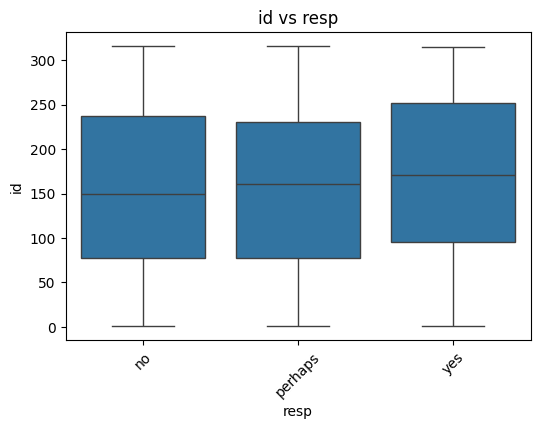

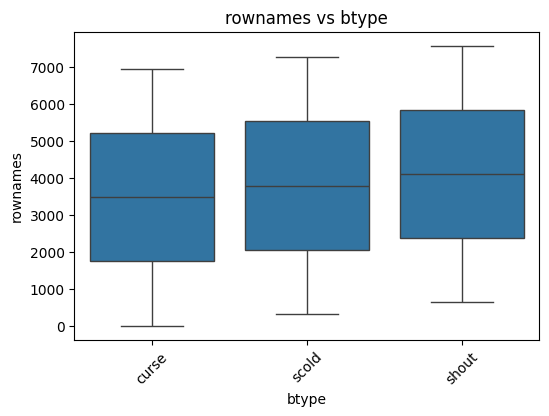

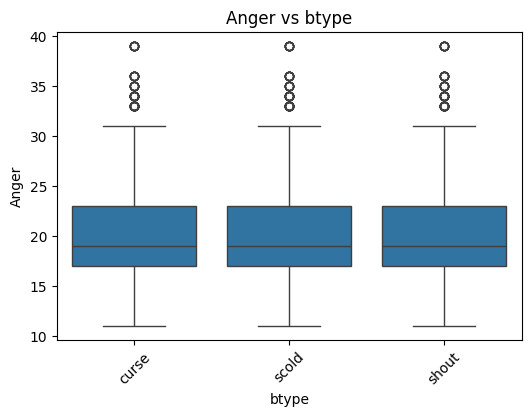

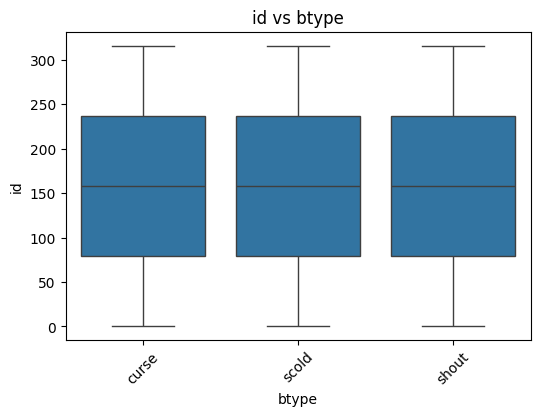

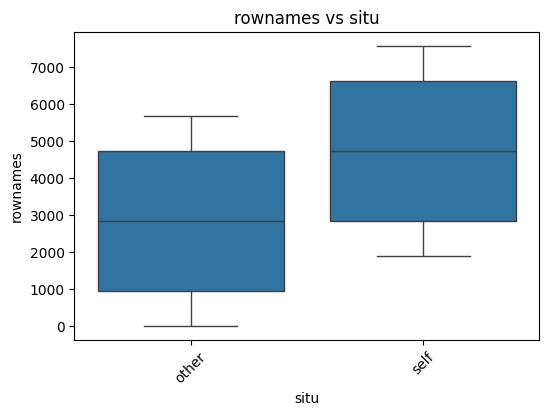

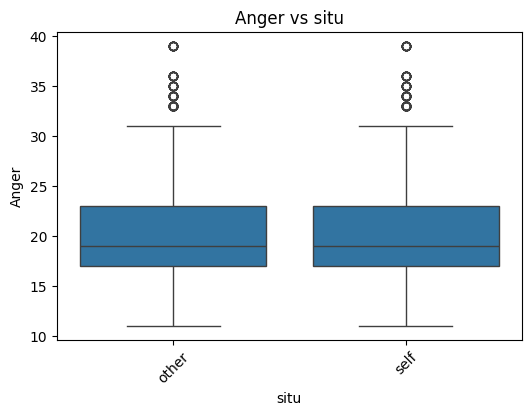

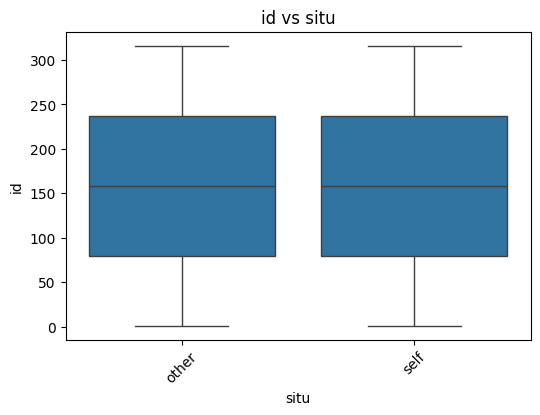

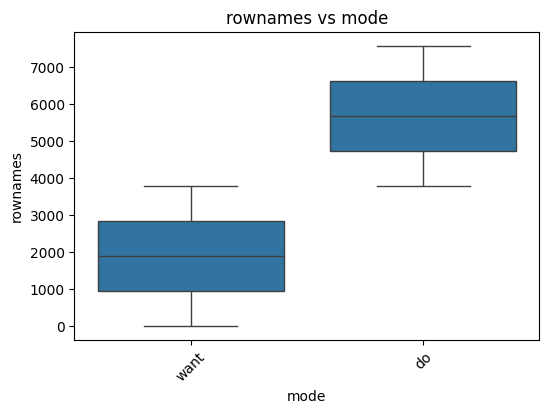

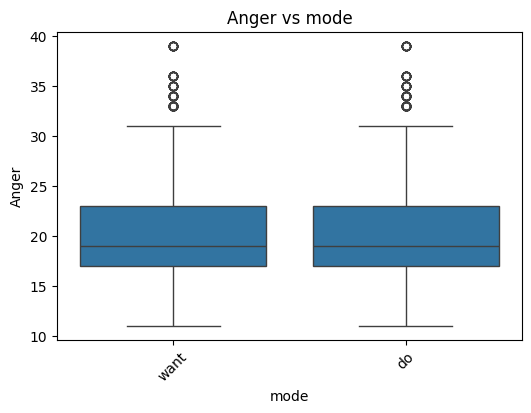

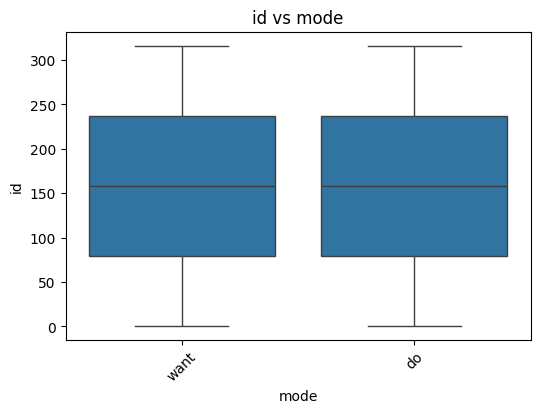

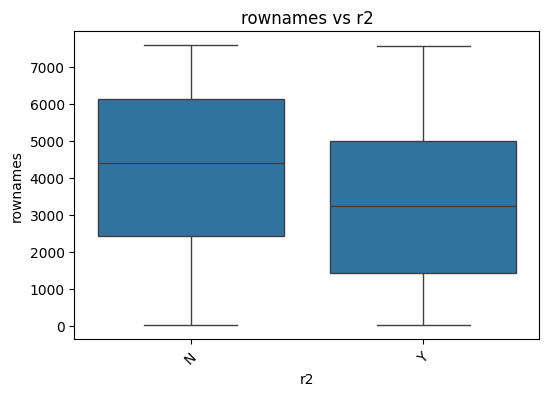

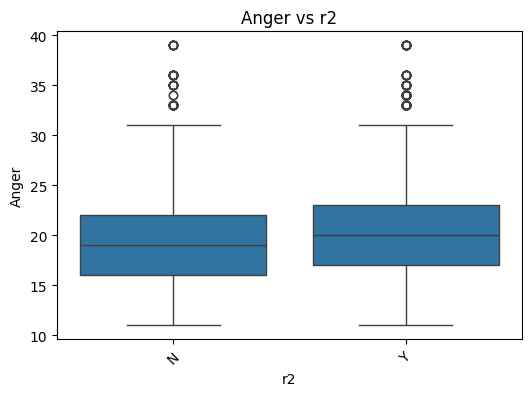

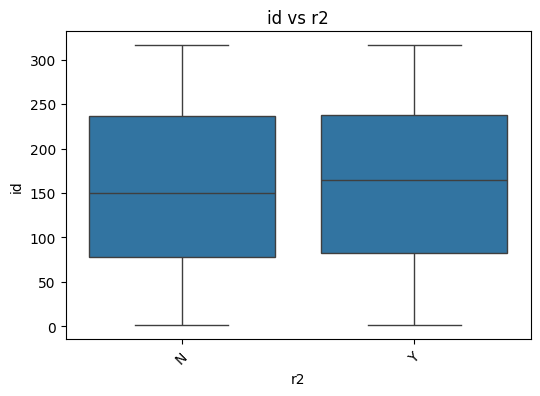

In [91]:
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=col, y=num)
        plt.title(f"{num} vs {col}")
        plt.xticks(rotation=45)
        plt.show()

In [92]:
if len(cat_cols) > 0 and len(num_cols) > 0:
    grouped = df.groupby(cat_cols[0])[num_cols].mean()
    print("\nGroup-wise Mean:\n", grouped)


Group-wise Mean:
            rownames      Anger          id
Gender                                    
F       3787.049383  20.053498  153.049383
M       3810.643836  19.835616  176.643836


In [ ]:
from itertools import combinations

num_pairs = list(combinations(num_cols, 2))  # All unique column pairs

for col_x, col_y in num_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col_x, y=col_y)
    plt.title(f"{col_x} vs {col_y}")
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()

In [ ]:
if len(cat_cols) > 0 and len(num_cols) > 0:
    # Exclude 'id' column from numerical columns if it exists
    num_cols_filtered = [col for col in num_cols if col != 'id']
    grouped = df.groupby(cat_cols[0])[num_cols_filtered].mean()
    print("\nGroup-wise Mean:\n", grouped)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

print(df.info())
print(df.dtypes)

# 3. Missing values
print("Missing values per column:\n", df.isna().sum())

# 4. Start and End (use rownames instead of time index)
print("Start row:", df["rownames"].min())
print("End row:", df["rownames"].max())

# 5. Frequency (not a time series → frequency doesn't apply,
# but we can check counts by Gender or other categories)
print("Frequency by Gender:\n", df["Gender"].value_counts())

# 6. Summary
print(df.describe(include="all"))

# 7. Decomposition (not directly valid since dataset is not time series)
# Example: if Anger is time-like by rownames
df_series = pd.Series(df["Anger"].values, index=pd.RangeIndex(start=1, stop=len(df)+1))
decomp = seasonal_decompose(df_series, model="additive", period=12)
decomp.plot()
plt.show()

# 8. Basic plot
plt.plot(df["rownames"], df["Anger"])
plt.title("Anger Scores over Subjects")
plt.xlabel("Row (rownames)")
plt.ylabel("Anger")
plt.show()

# 9. "Time series" style plot
df_series.plot(title="Anger as Series", ylabel="Anger", xlabel="Row")
plt.show()

# 10. Regression line
X = sm.add_constant(df["rownames"])
model = sm.OLS(df["Anger"], X).fit()
plt.scatter(df["rownames"], df["Anger"], label="Anger")
plt.plot(df["rownames"], model.predict(X), color="red", label="Trend line")
plt.legend()
plt.show()

# 11. Cycle equivalent (not months → maybe cycle by 'item' or 'resp')
print("Cycle by resp:\n", df.groupby("resp")["Anger"].mean())

# 12. Stationarity transforms
log_anger = np.log(df["Anger"])
diff_log_anger = log_anger.diff().dropna()

plt.subplot(1,2,1)
plt.plot(log_anger)
plt.title("Log(Anger)")

plt.subplot(1,2,2)
plt.plot(diff_log_anger)
plt.title("Differenced Log(Anger)")
plt.show()

# 13. Boxplot by category (e.g., Gender or item instead of cycle)
sns.boxplot(x="Gender", y="Anger", data=df)
plt.title("Boxplot of Anger by Gender")
plt.show()

sns.boxplot(x="item", y="Anger", data=df)
plt.title("Boxplot of Anger by Item")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df["Anger"].mean())
print(np.average(df["Anger"]))
print(np.sqrt(df["Anger"].mean()))
print(len(df["Anger"]) / np.sum(1/df["Anger"]))
print(np.exp(np.mean(np.log(df["Anger"]))))
print(np.median(df["Anger"]))

In [ ]:
def getmode(x):
    return Counter(x).most_common(1)[0][0]

print(getmode(df["Anger"]))

In [ ]:
print(df["Anger"].quantile(np.arange(0, 1.25, 0.25)))
print(df["Anger"].quantile(np.arange(0.1, 1.0, 0.1)))
print(df["Anger"].quantile(np.arange(0.01, 1.0, 0.01)))

In [ ]:
print(df["Anger"].min(), df["Anger"].max())
print(stats.iqr(df["Anger"]))


In [ ]:
deciles = df["Anger"].quantile([0.1, 0.9])
print(deciles.iloc[1] - deciles.iloc[0])

In [ ]:
print(df["Anger"].std())
print(df["Anger"].var())
print(skew(df["Anger"]))
print(kurtosis(df["Anger"]))


print(df["Anger"].value_counts())

In [ ]:
# Histogram + frequency polygon
hist_data = plt.hist(df["Anger"], bins=10, color="lightblue", edgecolor="black")
plt.plot((hist_data[1][:-1] + hist_data[1][1:]) / 2, hist_data[0], "r-o")
plt.title("22BDS0413 - Histogram with Frequency Polygon")
plt.show()



In [ ]:
# Relative frequency (pie & bar)
rf = pd.cut(df["Anger"], bins=5).value_counts(normalize=True)
print(rf)

rf.plot.pie(autopct="%.2f%%", title="22BDS0413 - Murder Distribution Pie Chart")
plt.show()

rf.plot.bar(color=sns.color_palette("rainbow", 5))
plt.title("22BDS0413 - Stacked Bar Plot")
plt.show()




In [ ]:
df["rownames"] = pd.to_numeric(df["rownames"], errors="coerce")
df["Anger"] = pd.to_numeric(df["Anger"], errors="coerce")
df["id"] = pd.to_numeric(df["id"], errors="coerce")

for col in ["Gender","item","resp","btype","situ","mode","r2"]:
    df[col] = df[col].astype("category")

print(df.info())
print(df.isna().sum())


tbl = pd.crosstab(df["Gender"], df["resp"])
tbl1 = pd.crosstab(df["Anger"], df["rownames"])
tbl2 = pd.crosstab(df["Anger"], df["Gender"])
print(tbl2.head())

tbl3 = pd.crosstab([df["Anger"], df["Gender"]], df["item"])


row_profiles = tbl2.div(tbl2.sum(axis=1), axis=0)
col_profiles = tbl2.div(tbl2.sum(axis=0), axis=1)
rel_freq = tbl2 / tbl2.values.sum()

chi2, p, dof, expected = chi2_contingency(tbl2)
indep_ratio = chi2 / tbl2.values.sum()

print(row_profiles, col_profiles, rel_freq, chi2, indep_ratio)

In [ ]:
# =============================
# Boxplot (Anger vs Gender)
# =============================
plt.figure(figsize=(6, 4))

sns.boxplot(data=df, x="Gender", y="Anger", hue="Gender", dodge=False)

sns.stripplot(data=df, x="Gender", y="Anger", color="red", jitter=0.2, alpha=0.5)

plt.title("Anger Distribution by Gender - 22BDS0413")
plt.xlabel("Gender")
plt.ylabel("Anger Score")
plt.legend([],[], frameon=False)
plt.show()


In [ ]:
# =============================
# 3D Scatter Plot
# =============================
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["rownames"], df["id"], df["Anger"], c="steelblue")
ax.set_xlabel("Row Name")
ax.set_ylabel("Subject ID")
ax.set_zlabel("Anger Score")
plt.title("3D Scatter Plot - 22BDS0413")
plt.show()

In [ ]:
# =============================
# Lollipop Chart (id vs Anger)
# =============================
plt.stem(df["id"], df["Anger"], basefmt=" ", linefmt="grey", markerfmt=" ")
plt.scatter(df["id"], df["Anger"], c=df["Gender"].cat.codes, cmap="coolwarm", s=60, alpha=0.8)
plt.title("Anger Score by Subject ID - 22BDS0413")
plt.show()

In [ ]:
# =============================
# Boxplot (Anger vs btype)
# =============================
sns.boxplot(data=df, x="btype", y="Anger")
plt.title("Anger Score Distribution by Behavior Type - 22BDS0413")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# =============================
# Hierarchical Clustering
# =============================
df_small = df.iloc[:100][["Anger", "id"]]

for method, color in [("euclidean", "red"),
                      ("cityblock", "blue"),
                      ("chebyshev", "green"),
                      ("canberra", "purple"),
                      ("hamming", "orange"),
                      ("minkowski", "brown")]:

    dist_matrix = pdist(df_small.values, metric=method if method!="minkowski" else "minkowski")
    linkage_matrix = linkage(dist_matrix, method="ward")

    plt.figure()
    dendrogram(linkage_matrix, labels=df_small["id"].values, leaf_rotation=90, leaf_font_size=6)
    plt.title(f"22BDS0413 - Dendrogram - {method.capitalize()} Distance")
    plt.show()

    clusters = cut_tree(linkage_matrix, n_clusters=3)
    print(f"{method} clustering:\n", clusters[:10])

In [ ]:
# Discretization example: Bin Anger scores into 3 groups
df["Anger_bins"] = pd.cut(df["Anger"], bins=3, labels=["Low", "Medium", "High"])
print(df[["Anger", "Anger_bins"]].head())


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale numerical features
X = StandardScaler().fit_transform(df[["Anger", "id"]])

# DBSCAN for outlier detection
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
df["Cluster"] = db.labels_

# Outliers are labeled as -1
outliers = df[df["Cluster"] == -1]
print("Outliers detected:\n", outliers.head())

plt.scatter(df["id"], df["Anger"], c=df["Cluster"], cmap="tab10")
plt.title("DBSCAN Clustering with Outlier Detection")
plt.show()


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=0)
df[num_cols] = imp.fit_transform(df[num_cols])
print("Missing values after MLE-style imputation:\n", df.isna().sum())


In [ ]:
# ===============================
# 🔍 3. Basic Preprocessing
# ===============================
# Drop ID-like columns if any
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# ===============================
# ⚙️ 4. Feature Scaling
# ===============================
X = df.drop(columns=df.columns[-1])   # all columns except last one as features
y = df[df.columns[-1]]                # last column as target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 🧩 5. PCA for Dimensionality Reduction
# ===============================
pca = PCA(n_components=2)   # reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize the two components
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization (2 Components)")
plt.colorbar(label='Target')
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X_scaled)
plt.scatter(pca_res[:,0], pca_res[:,1])
plt.title("PCA - Dimensionality Reduction")
plt.show()

# ===============================
# 🤖 6. Model Building (Classification)
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

le = LabelEncoder()
df['r2'] = le.fit_transform(df['r2'])
X = df.select_dtypes(include=[np.number])
y = df['r2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


# ===============================
# 📈 7. Model Evaluation
# ===============================
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
